# Task 5  To Explore Business Analytics

##### You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

## Importing the libraries

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv(r"C:\Users\SADDAL\Documents\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#rows and columns of the dataset
df.shape

(9994, 13)

In [4]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


##### No Null values found, so we can move to the next part

In [5]:
#Statistical summary of dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#checking for duplicate values
df.duplicated().sum()

17

In [7]:
#removing duplicate values
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
df.duplicated().sum()

0

## Exploratory Data analysis

### Visualizing the dataset

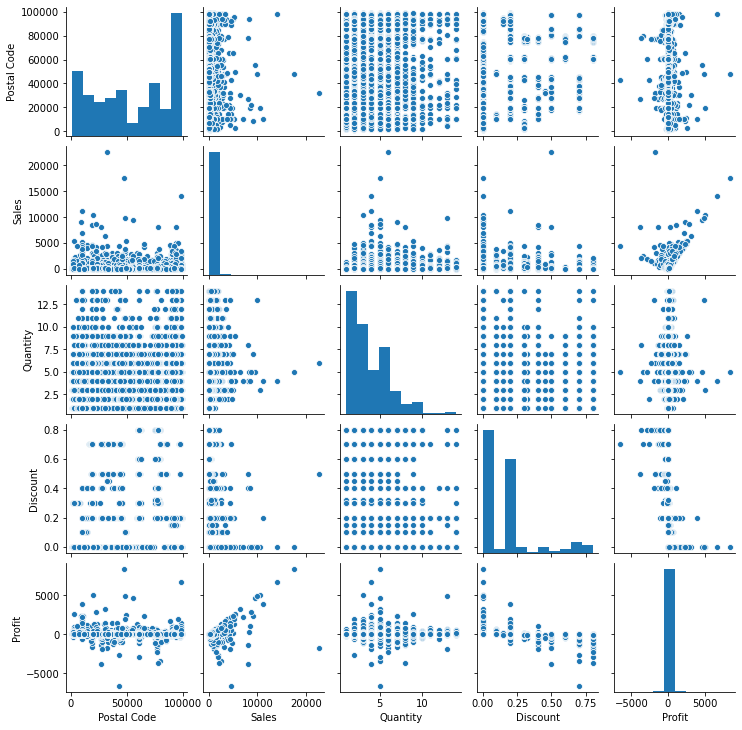

In [8]:
sns.pairplot(df,height=2);

### Correlation

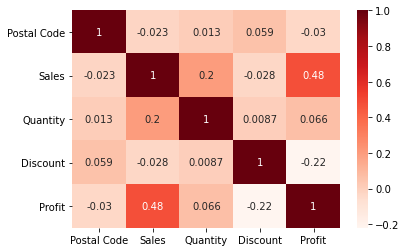

In [9]:
#heat map 
corr = df.corr()
sns.heatmap(corr,cmap = "Reds", annot = True)
plt.show()

### Visualizing individual parameters

Text(0.5, 0, 'Profit')

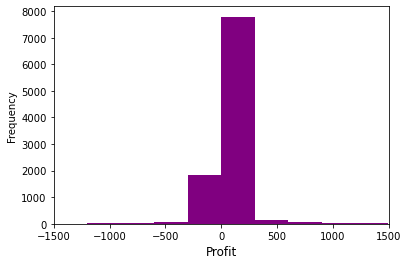

In [10]:
#visualizing profit
df['Profit'].plot.hist(bins=50,color="purple")
plt.xlim(-1500,1500)
plt.xlabel('Profit', fontsize=12)

Text(0.5, 0, 'Sales')

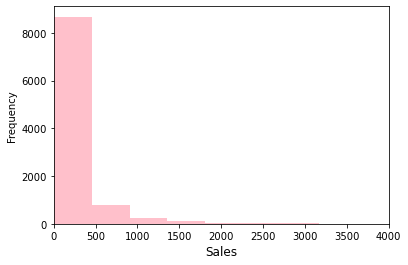

In [11]:
#visualizing sales
df['Sales'].plot.hist(bins=50,color="pink")
plt.xlim(0,4000)
plt.xlabel('Sales', fontsize=12)

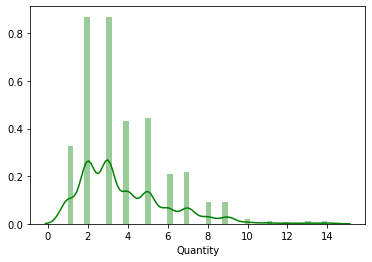

In [12]:
#visualizing Quantity
sns.distplot(df['Quantity'], color= 'green')
plt.show()

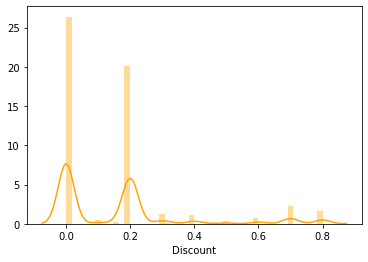

In [13]:
#visualizing duscount
sns.distplot(df['Discount'], color= 'orange')
plt.show()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


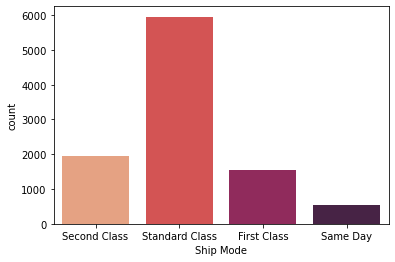

In [14]:
#visualizing Ship mode
print(df['Ship Mode'].value_counts())
sns.countplot(x = df["Ship Mode"],palette="rocket_r")
plt.show()

##### "Standard Class" is preferred shipping mode 
##### "Same day" is least preferred shipping mode

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


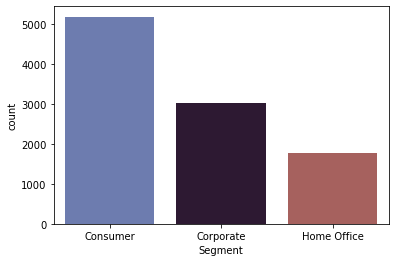

In [15]:
#visualizing Segment
print(df['Segment'].value_counts())
sns.countplot(x = df['Segment'],palette="twilight")
plt.show()

##### Highest segment is of "Consumer"
##### Lowest segment is of "Home office"

United States    9977
Name: Country, dtype: int64


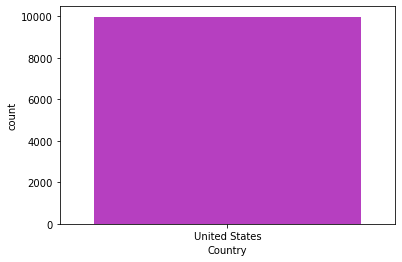

In [16]:
#visualizing Country
print(df['Country'].value_counts())
sns.countplot(x = df['Country'],palette="gnuplot2")
plt.show()

##### The survey is of United States only

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


Text(0.5, 1.0, 'Percentage of sales in diff Regions of USA')

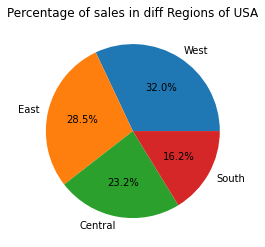

In [17]:
#Visualizing Region
theme = plt.get_cmap('hsv')
print(df['Region'].value_counts())
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales in diff Regions of USA')

##### Maximum sales were in "West Region" 
##### Minimum sales were in "South Region"

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


Text(0.5, 1.0, 'Percentage of sales for different categories')

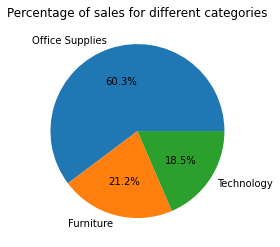

In [18]:
#Visualizing Category
print(df['Category'].value_counts())
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales for different categories')

##### Most selling category is "Office supllies"
##### Least selling category is "Technolgy"

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


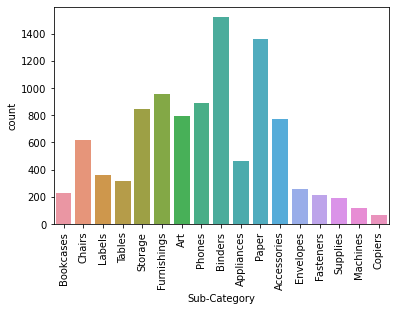

In [19]:
#Visualizing Sub-category
print(df['Sub-Category'].value_counts())
sns.countplot(x = df['Sub-Category'])
plt.xticks(rotation = 90)
plt.show()

##### In OFFICE SUPLLIES:
##### "Binders" are high in demand
##### "Copiers" are not of use to many

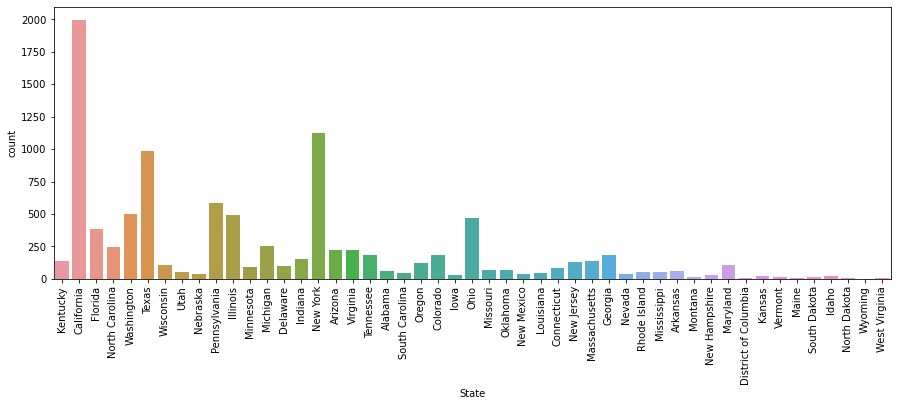

In [20]:
#Visualizing State
plt.figure(figsize=(15,5))
sns.countplot(x = df.State)
plt.xticks(rotation = 90)
plt.show()

##### maximum number of people are from "California" and "New York"
##### least number of people are from "Wyoming"

### Profit, Loss and Sales visualization

New York City        914
Los Angeles          746
Philadelphia         536
San Francisco        506
Seattle              424
                    ... 
Conway                 1
Missouri City          1
Holyoke                1
Arlington Heights      1
Palatine               1
Name: City, Length: 531, dtype: int64


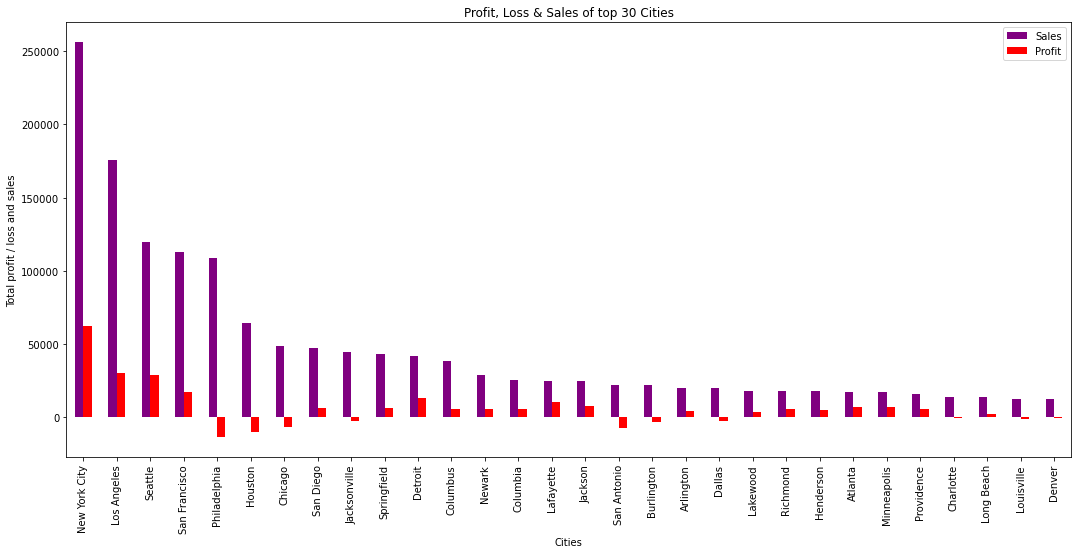

In [21]:
#City wise analysis of Profits and sale
print(df['City'].value_counts())
City = df.groupby("City")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False)
City[:30].plot(kind = "bar", color = ["purple", "red"],figsize= (18,8))
plt.title("Profit, Loss & Sales of top 30 Cities")
plt.xlabel("Cities")
plt.ylabel("Total profit / loss and sales")
plt.show()

##### New york has maximum sales and profit
##### Philadelphia, Houston, Chicago, Jacksonville, San antonio, Burlington, Dallas, Charlotte, Louisville and Denver face loss

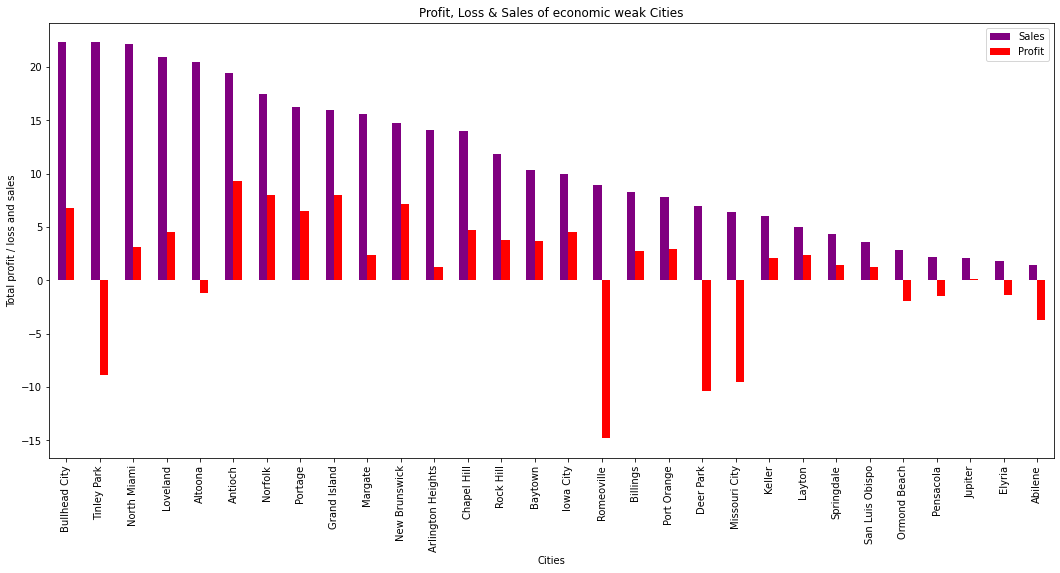

In [22]:
#Profit, Loss & Sales of economic weak Cities
City[-30:].plot(kind = "bar", color = ["purple", "red"],figsize= (18,8))
plt.title("Profit, Loss & Sales of economic weak Cities")
plt.xlabel("Cities")
plt.ylabel("Total profit / loss and sales")
plt.show()

##### Cities like Romeoville , Deer Park, Tinley Park, Missouri are facing too much loss

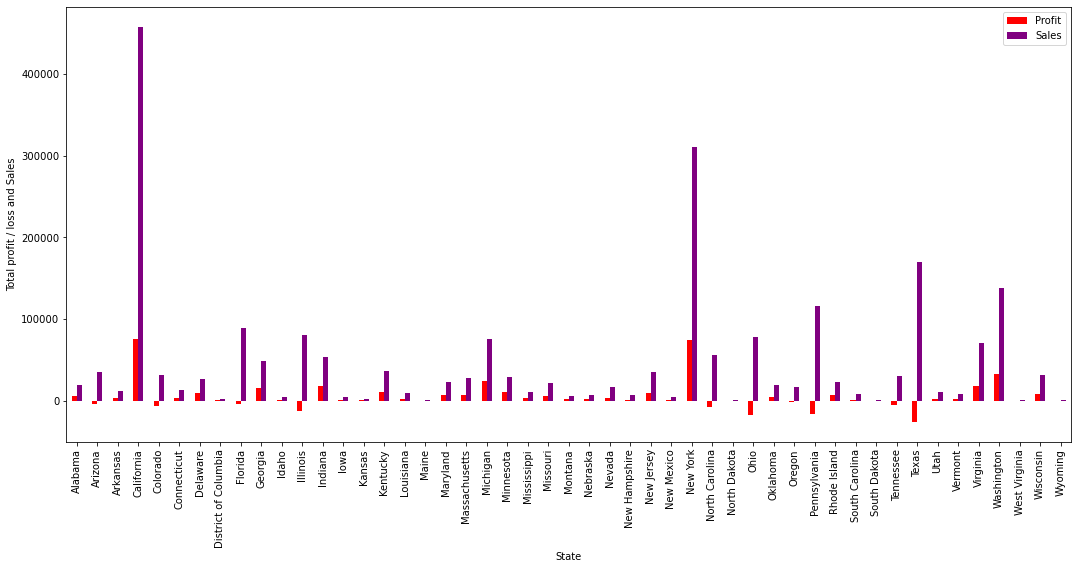

In [23]:
#State wise analysis of Profit and Sales:
df.groupby('State')[['Profit', 'Sales']].sum().plot.bar(color = ["red", "purple"],figsize= (18,8))
plt.ylabel("Total profit / loss and Sales")
plt.show()

##### California has maximum sales with good profit whereas many states such as Texas and Ohio face loss

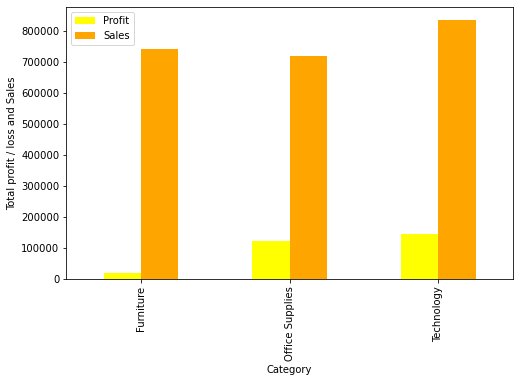

In [24]:
#Category wise analysis of Profit and Sales
df.groupby('Category')[['Profit', 'Sales']].sum().plot.bar(color = ["yellow", "orange"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

##### Although sales of Office supplies is not higher than Furniture but Office supplies make more profit

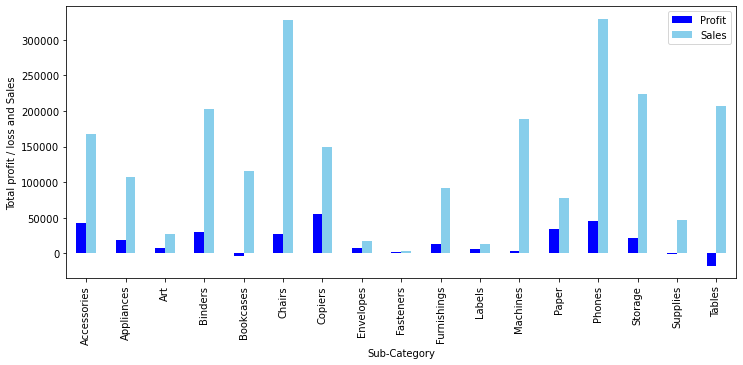

In [25]:
#Sub-Category wise analysis of Profit and Sales
df.groupby('Sub-Category')[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "skyblue"],figsize= (12,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

##### Sub-categories like Tables and bookcases face loss

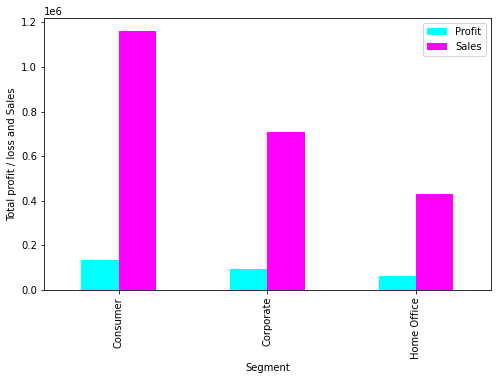

In [26]:
#Segment wise analysis of profit and sales
df.groupby('Segment')[['Profit', 'Sales']].sum().plot.bar(color = ["cyan", "magenta"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

##### Consumer makes the highest profit and sales

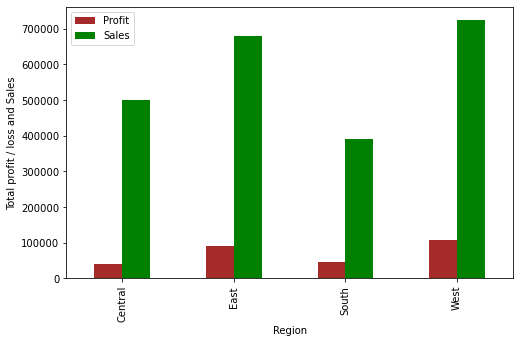

In [27]:
#Region wise analysis of profit and sales
df.groupby('Region')[['Profit', 'Sales']].sum().plot.bar(color = ["brown", "green"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

##### Sales and profit are high in West region

# Conclusion:
-Same day shipping mode should be improved

-Sales in south region should be increased

-Technology is the least selling category

-All the subcategories should be given equal attention for increasing sales.

-We should expand in all the states of US

-Sales should be increased in southern regions as presently it has the lowest sales.

-Furniture supplies have low profit relative to its sale. Profit should be maximised in this category.

-States like Ohio and Texas are facing high losses, improvement should be made in such states.

-Profit and Sales are related to each other but the proportion is not very uniforn.Hence we should to work on both sales and profit seperately to increase them.
